# Plotting Maps

In [6]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Scale for maps
from matplotlib_scalebar.scalebar import ScaleBar
# Personalised legends for maps
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

import os

import geopandas as gpd
import rasterio as rio
import fiona
import contextily
import osmnx
from shapely import geometry

In [50]:
# Set working directory
os.chdir("/Users/unaioyon/Desktop/masters_thesis/data/fra")

# 1. Import all the relevant data

In [8]:
# DV3F
dv3f = gpd.read_file("dv3f_new_variables/dv3f_geo_light.geojson")

In [9]:
# Accidents
acc = gpd.read_file("accidents/final/accidents_final_geo.geojson")

In [63]:
# Arrondissements
arr = gpd.read_file("arrondissements/arrondissements.shp")
# IRIS
iris = gpd.read_file("iris/geo/iris_paris_2022/1_DONNEES_LIVRAISON_2022-05-00266/IRIS-GE_2-0_SHP_LAMB93_D075-2022/IRIS_GE.shp")
# Quartiers
quart = gpd.read_file("quartiers/quartier_paris.shp")
# Streets
voie = gpd.read_file("streets/troncon_voie.shp")
# Zones 30
zones = gpd.read_file("zones_30/zones-30.shp")

In [11]:
# Water bodies
eau = gpd.read_file("eau/plan-de-voirie-voies-deau.shp")
# Green spaces
green = gpd.read_file("green_spaces/espaces_verts.shp")

In [13]:
# College
col = gpd.read_file("schools/colleges/etablissements-scolaires-colleges.shp")
mat = gpd.read_file("schools/maternelles/etablissements-scolaires-maternelles.shp")
ele = gpd.read_file("schools/elementary/etablissements-scolaires-ecoles-elementaires.shp")

In [14]:
# Transport
arrets = gpd.read_file("transport/idf_mobilites/arrets/arrets_paris.geojson")
zarrets = gpd.read_file("transport/idf_mobilites/z_arrets/z_arrets_paris.shp")
zcorr = gpd.read_file("transport/idf_mobilites/z_correspondances/z_correspondances_paris.shp")

In [64]:
# Make their CRS compatible
dv3f.to_crs("4326", inplace = True)
acc.to_crs("4326", inplace = True)
arr.to_crs("4326", inplace = True)
eau.to_crs("4326", inplace = True)
green.to_crs("4326", inplace = True)
iris.to_crs("4326", inplace = True)
quart.to_crs("4326", inplace = True)
col.to_crs("4326", inplace = True)
mat.to_crs("4326", inplace = True)
ele.to_crs("4326", inplace = True)
voie.to_crs("4326", inplace = True)
arrets.to_crs("4326", inplace = True)
zarrets.to_crs("4326", inplace = True)
zcorr.to_crs("4326", inplace = True)
zones.to_crs("4326", inplace = True)

# 2. Start plotting

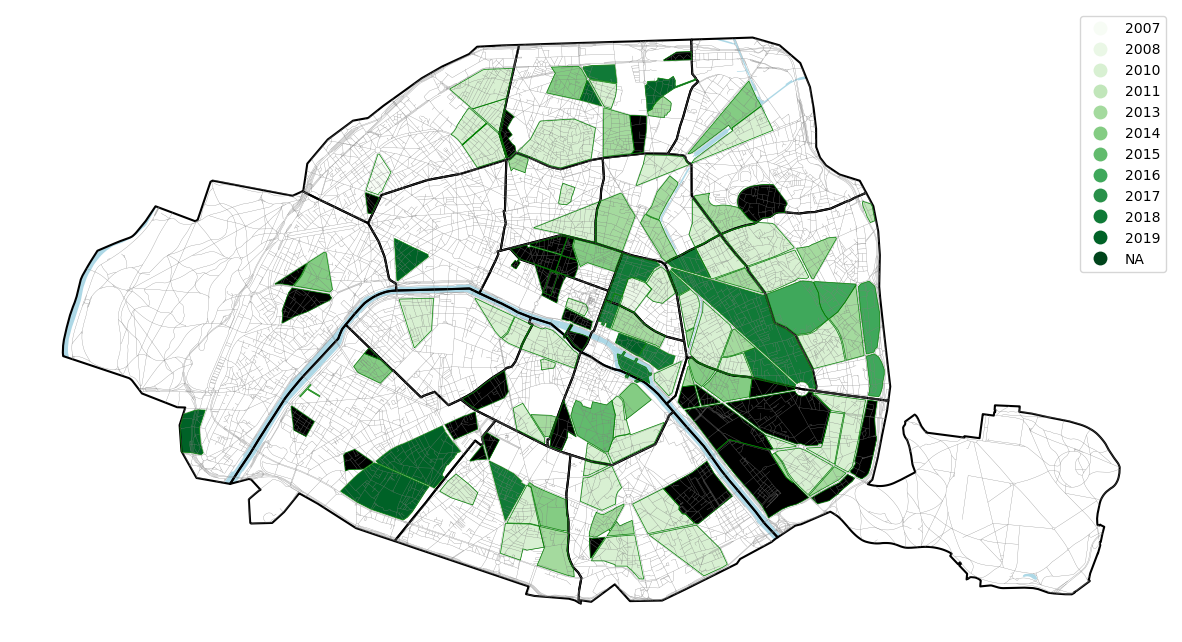

In [141]:
# SLOW ZONES BY YEAR OF IMPLEMENTATION
fig, ax = plt.subplots(1, figsize = (15, 15))

arr.boundary.plot(ax = ax, linewidth = 1.5, color = "black")
eau.plot(ax = ax, color = "lightblue")
voie.plot(ax = ax, linewidth = 0.2, color = "grey")
zones.plot(ax = ax, column = "year", cmap = "Greens", legend = True)
zones.boundary.plot(ax = ax, linewidth = 0.5, color = "green")
zones.loc[zones["year"] == "NA",:].plot(ax = ax, color = "black", legend = True)
ax.axis("off")

leg = ax.get_legend()
leg.legendHandles[11].set_color("red")

#fig.savefig("/Users/unaioyon/Desktop/masters_thesis/graphs/slow_zones_year.pdf")

(2.2117943216919422, 2.4820450839003567, 48.81124740588755, 48.906491168356695)

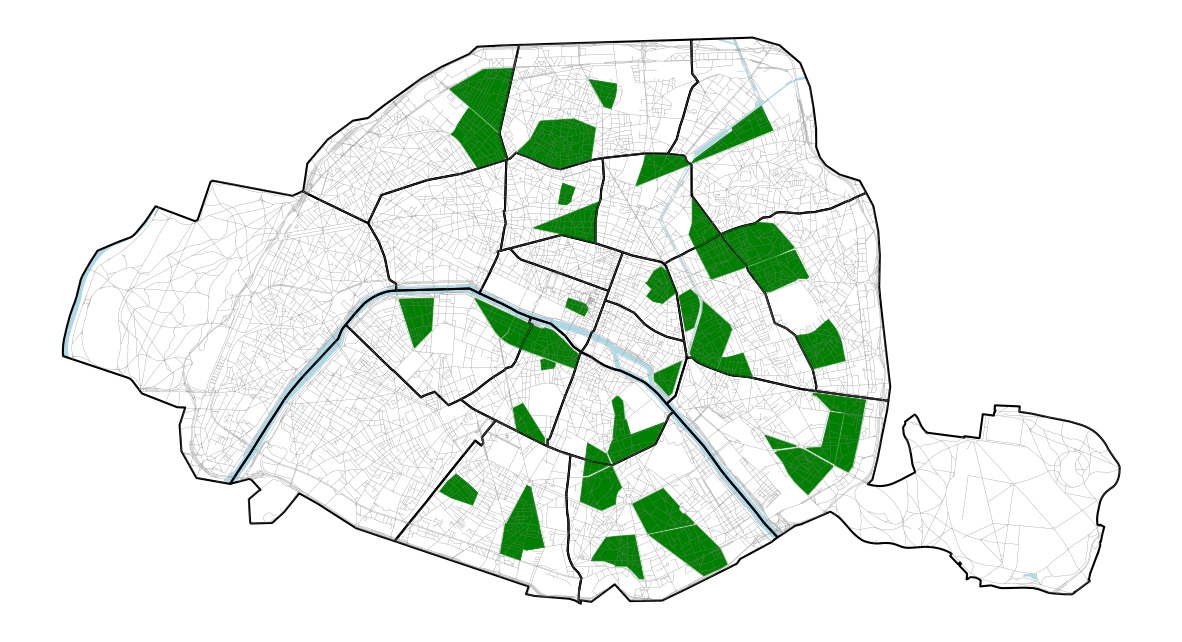

In [119]:
# SLOW ZONES BY YEAR OF IMPLEMENTATION
fig, ax = plt.subplots(1, figsize = (15, 15))

arr.boundary.plot(ax = ax, linewidth = 1.5, color = "black")
eau.plot(ax = ax, color = "lightblue")
voie.plot(ax = ax, linewidth = 0.2, color = "grey")
zones[zones["year"] == "2010"].plot(ax = ax, color = "green")
zones[zones["year"] == "2010"].boundary.plot(ax = ax, linewidth = 0.5, color = "green")
ax.axis("off")

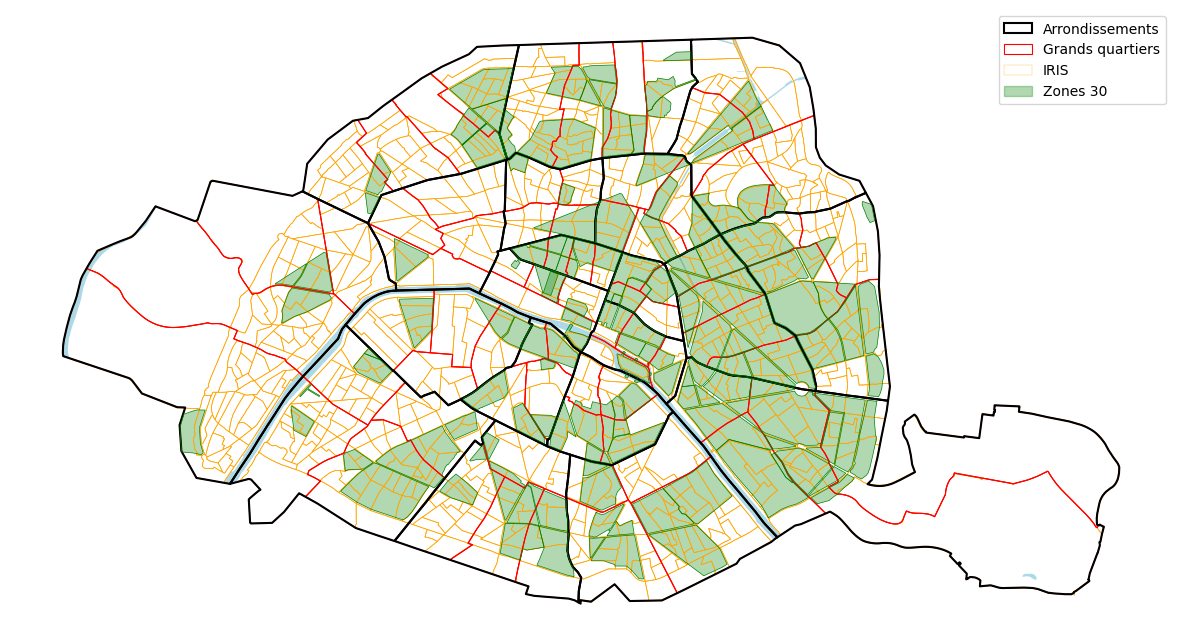

In [81]:
# SLOW ZONES overlapped with IRIS, QUARTIERS AND ARRONDISSEMENTS
fig, ax = plt.subplots(1, figsize = (15, 15))


# Generating a personalised legend
legend_overlap1 = [Patch(facecolor="white", edgecolor="black", linewidth = 1.5,
                         label="Arrondissements"),
                   Patch(facecolor="white", edgecolor="red", linewidth = 0.8,
                         label="Grands quartiers"),
                  Patch(facecolor="white", edgecolor="orange", linewidth = 0.2,
                         label="IRIS"),
                   Patch(facecolor="green", edgecolor="green", alpha = 0.3,
                         label="Zones 30")]



iris.boundary.plot(ax = ax, linewidth = 0.5, color = "orange")
quart.boundary.plot(ax = ax, linewidth = 0.8, color = "red")
arr.boundary.plot(ax = ax, linewidth = 1.5, color = "black")

eau.plot(ax = ax, color = "lightblue")
#zones.plot(ax = ax, column = "year", cmap = "Greens", legend = True)
zones.plot(ax = ax, linewidth = 1, alpha = 0.3, color = "green")
zones.boundary.plot(ax = ax, linewidth = 0.5, color = "green")

ax.axis("off")
ax.legend(handles=legend_overlap1, loc="best")

fig.savefig("/Users/unaioyon/Desktop/masters_thesis/graphs/slow_zones_overlap1.pdf")

In [89]:
zones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   nom_zca    142 non-null    object  
 1   date_arr   106 non-null    object  
 2   month      106 non-null    object  
 3   year       106 non-null    object  
 4   type_arr   108 non-null    object  
 5   arrdt      141 non-null    object  
 6   reglement  142 non-null    object  
 7   geometry   133 non-null    geometry
dtypes: geometry(1), object(7)
memory usage: 9.0+ KB


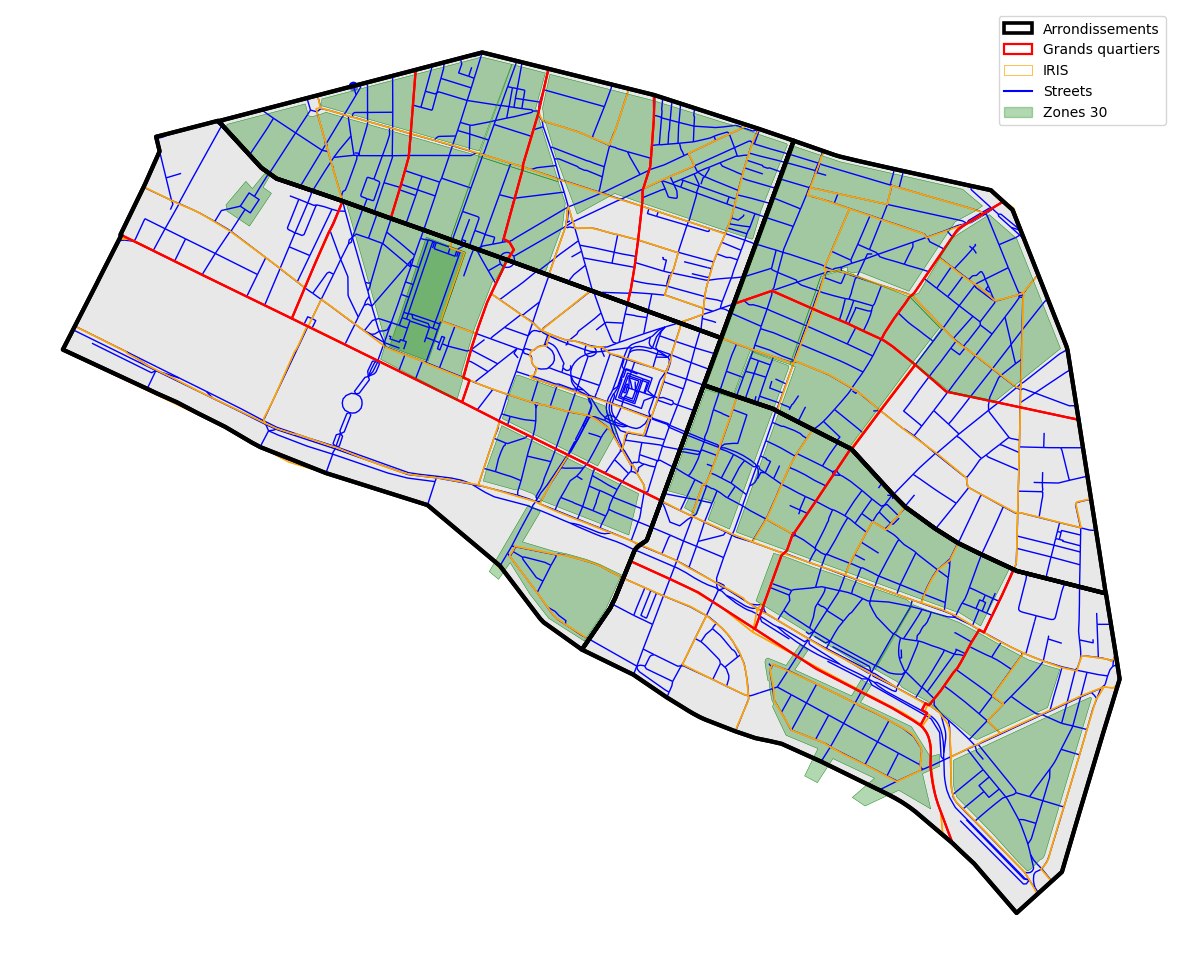

In [117]:
# SLOW ZONES overlapped with IRIS, QUARTIERS AND ARRONDISSEMENTS
fig, ax = plt.subplots(1, figsize = (15,15))

# Generating a personalised legend
legend_overlap2 = [Patch(facecolor="white", edgecolor="black", linewidth = 2.6,
                         label="Arrondissements"),
                   Patch(facecolor="white", edgecolor="red", linewidth = 1.6,
                         label="Grands quartiers"),
                   Patch(facecolor="white", edgecolor="orange", linewidth = 0.5,
                         label="IRIS"),
                   Line2D([0], [0], marker="v", color="blue",label="Streets",
                          markeredgecolor="blue", markersize=0),
                   Patch(facecolor="green", edgecolor="green", alpha = 0.3,
                         label="Zones 30")]

voie.overlay(arr.loc[arr["c_ar"].isin(["1", "2", "3", "4"])],
            keep_geom_type = False).plot(ax = ax, linewidth = 1, color = "blue")
iris.loc[iris["INSEE_COM"].isin(["75103", "75101", "75102", "75104"]), :].plot(ax = ax, color = "lightgrey", alpha = 0.5)
iris.loc[iris["INSEE_COM"].isin(["75103", "75101", "75102", "75104"]), :].boundary.plot(ax = ax, color = "orange", linewidth = 1)
quart.loc[quart["c_ar"].isin(["3", "1", "2", "4"]), :].boundary.plot(ax = ax, linewidth = 1.6, color = "red")

arr.loc[arr["c_ar"].isin(["3", "1", "2", "4"]),:].boundary.plot(ax = ax, linewidth = 3, color = "black")

zones.loc[zones["arrdt"].isin(["3", "1", "2", "4"]), :].plot(ax = ax, color = "green", alpha = 0.3)
zones.loc[zones["arrdt"].isin(["3", "1", "2", "4"]), :].boundary.plot(ax = ax, color = "green", linewidth = 0.3)
arr.boundary.loc[arr["c_ar"].isin(["1", "2", "3", "4"])].plot(ax = ax, linewidth = 3, color = "black")
ax.axis("off")

ax.legend(handles=legend_overlap2, loc="best")

fig.savefig("/Users/unaioyon/Desktop/masters_thesis/graphs/slow_zones_overlap2.pdf")